<a href="https://colab.research.google.com/github/KeitaW/Colab-Notebooks/blob/master/IMLWO_chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![表紙](https://www.oreilly.co.jp/books/images/picture978-4-87311-916-8.gif)

このノートブックはオライリー・ジャパンより発行の書籍[『ウェブ最適化ではじめる機械学習』（飯塚 修平　著）](https://www.oreilly.co.jp/books/9784873119168/)のサンプルコードです。コードの解説等は書籍をご参照ください。なお、このコードを動作させた結果について、著者およびオライリー・ジャパンは一切の責任を負いません。

# 1章: A/Bテストからはじめよう: ベイズ統計による仮説検定入門

必要なモジュールの読み込み

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

plt.style.use('grayscale')
plt.style.use('seaborn-whitegrid')
np.random.seed(0)

理想的なサイコロの各面が出る確率

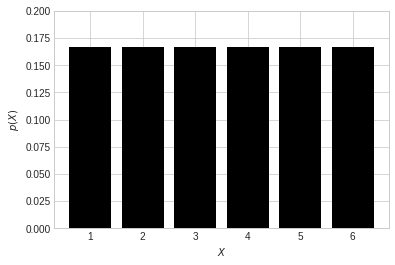

In [ ]:
xs = [i + 1 for i in range(6)]
ps = [1./6 for x in xs]
plt.ylim(0, 0.2)
plt.xlabel(r'$X$')
plt.ylabel(r'$p(X)$')
plt.bar(xs, ps)
plt.show()

福引で各賞が出る確率分布の例

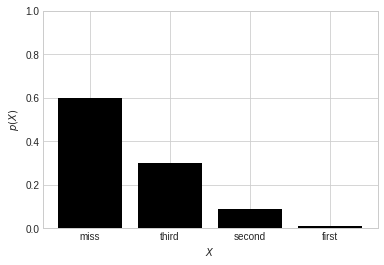

In [ ]:
xs = ['miss', 'third', 'second', 'first']
ps = [0.6, 0.3, 0.09, 0.01]
plt.ylim(0, 1)
plt.xlabel(r'$X$')
plt.ylabel(r'$p(X)$')
plt.bar(xs, ps)
plt.show()

### 離散値の確率分布

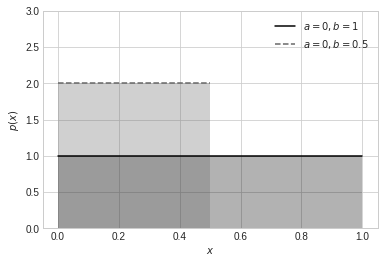

In [ ]:
plt.plot([0, 1], [1, 1], label=r'$a=0, b=1$')
plt.plot([0, 0.5], [2, 2], label=r'$a=0, b=0.5$', linestyle='--')
plt.ylim(0, 3)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.fill_between([0, 1], 0, [1, 1], alpha=0.3)
plt.fill_between([0, 0.5], 0, [2, 2], alpha=0.3)
plt.legend()
plt.show()

### 離散化による確率密度関数の近似

確率密度関数 $f(x)$ と、離散化によって近似した関数。

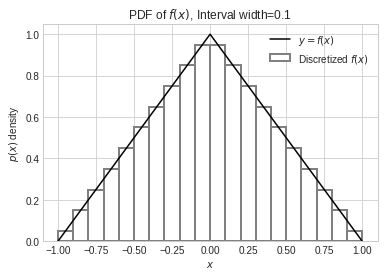

In [ ]:
step = 0.1
f = lambda x: x + 1 if x < 0 else -x + 1
xs = np.linspace(-1, 1, 21)

plt.plot(xs, [f(x) for x in xs], label=r'$y = f(x)$')
xss = (xs + step/2)[:-1]
fs = [f(x) for x in xss]
plt.bar(xss, fs, width=step, color='white', edgecolor='gray', label=r'Discretized $f(x)$', linewidth=2)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$ density')
plt.legend()
plt.title('PDF of $f(x)$, Interval width=%.1f' % (2/20))
plt.show()

$f(x)$ を確率質量関数で近似した結果

Text(0.5, 1.0, 'PMF approximation of $f(x)$, Interval width=0.1')

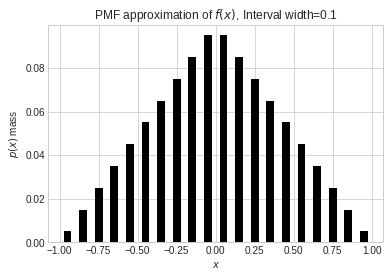

In [ ]:
step = 0.1
f = lambda x: x + 1 if x < 0 else -x + 1
xs = np.linspace(-1, 1, 21)
xss = (xs + step/2)[:-1]
fs = [f(x) for x in xss]

plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$ mass')
plt.bar(xss, fs / sum(fs), width=0.05, linewidth=0)
plt.title('PMF approximation of $f(x)$, Interval width=%.1f'% (2/20))

## ベイズの定理を使ったクリック率の推論
さまざまなベルヌーイ分布の例

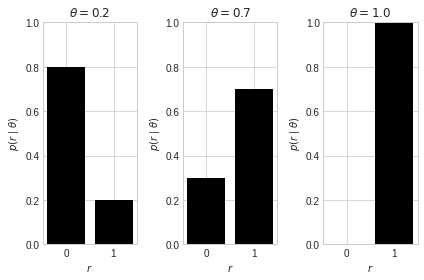

In [ ]:
plt.subplot(1, 3, 1)
theta = 0.2
plt.title(r'$\theta=%.1f$'%theta)
plt.ylim(0, 1)
plt.xlabel(r'$r$')
plt.ylabel(r'$p(r\mid\theta)$')
plt.bar(['0', '1'], [1 - theta, theta])
plt.subplot(1, 3, 2)
theta = 0.7
plt.title(r'$\theta=%.1f$'%theta)
plt.ylim(0, 1)
plt.xlabel(r'$r$')
plt.ylabel(r'$p(r\mid\theta)$')
plt.bar(['0', '1'], [1 - theta, theta])
plt.subplot(1, 3, 3)
theta = 1
plt.title(r'$\theta=%.1f$'%theta)
plt.ylim(0, 1)
plt.xlabel(r'$r$')
plt.ylabel(r'$p(r\mid\theta)$')
plt.bar(['0', '1'], [1 - theta, theta])
plt.tight_layout()

ベルヌーイ分布の3D表現

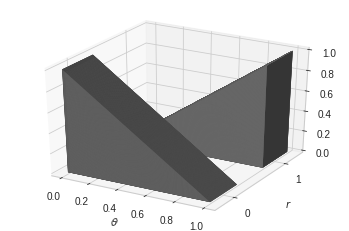

In [ ]:
steps = 1000
thetas = np.linspace(0, 1, steps)
rs = [0, 1]
p = lambda theta, r: (theta ** r) * ((1 - theta) ** (1 - r))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = []
y = []
z = []
for theta in thetas:
  for r in rs:
    x.append(theta)
    y.append(r - 0.25)
    z.append(p(theta, r))
ax.bar3d(x, y, 0, 1/steps, 0.5, z, color='gray', shade=True)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('$r$')
ax.set_yticks([0, 1])
plt.show()

事前分布と尤度関数の積

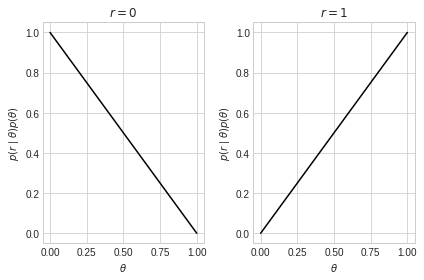

In [ ]:
thetas = np.linspace(0, 1, 100)
plt.subplot(1, 2, 1)
plt.plot(thetas, 1 - thetas)
plt.title(r'$r=0$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(r\mid\theta)p(\theta)$')
plt.subplot(1, 2, 2)
plt.plot(thetas, thetas)
plt.title(r'$r=1$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(r\mid\theta)p(\theta)$')
plt.tight_layout()
plt.show()

### ベイズ推論をプログラムする

In [ ]:
thetas = np.linspace(0, 1, 1001)
print(thetas)

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


In [ ]:
likelihood = lambda r: thetas if r else (1 - thetas)

In [ ]:
def posterior(r, prior):
  lp = likelihood(r) * prior
  return lp / lp.sum()

In [ ]:
p = np.array([1 / len(thetas) for _ in thetas])
print(p)

[0.000999 0.000999 0.000999 ... 0.000999 0.000999 0.000999]


In [ ]:
p = posterior(1, p)  # クリック
print(p)

[0.00000000e+00 1.99800200e-06 3.99600400e-06 ... 1.99400599e-03
 1.99600400e-03 1.99800200e-03]


Matplotlibによる事後分布の可視化

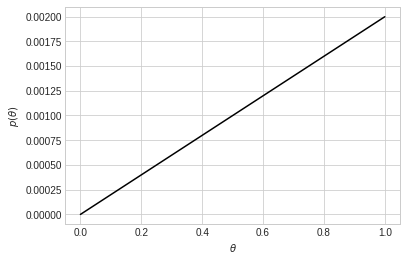

In [ ]:
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

In [ ]:
clicks = 2
noclicks = 38

アリスのレポートのデザインA案のクリック率 $\theta$ の事後分布

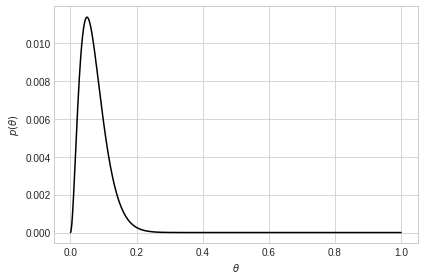

In [ ]:
p = np.array([1 / len(thetas) for theta in thetas])
for _ in range(clicks):
  p = posterior(1, p)
for _ in range(noclicks):
  p = posterior(0, p)
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.tight_layout()
plt.show()

アリスとボブのレポートに基づいたクリック率 $\theta$ の事後分布

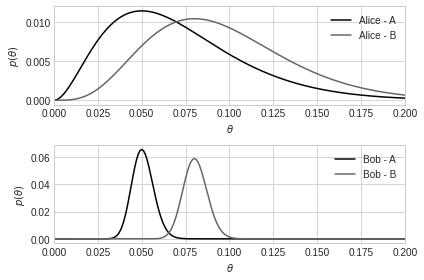

In [ ]:
def draw(clicks, noclicks, label):
  p = np.array([1 / len(thetas) for theta in thetas])
  for _ in range(clicks):
    p = posterior(1, p)
  for _ in range(noclicks):
    p = posterior(0, p)
  plt.plot(thetas, p, label=label)
  
plt.subplot(2, 1, 1)
draw(2, 40 - 2, 'Alice - A')
draw(4, 50 - 4, 'Alice - B')
plt.xlim(0, 0.2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.legend()
plt.subplot(2, 1, 2)
draw(64, 1280 - 64, 'Bob - A')
draw(128, 1600 - 128, 'Bob - B')
plt.xlim(0, 0.2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.legend()
plt.tight_layout()
plt.show()

## 別解1: 繰り返しをまとめる

さまざまな二項分布の例

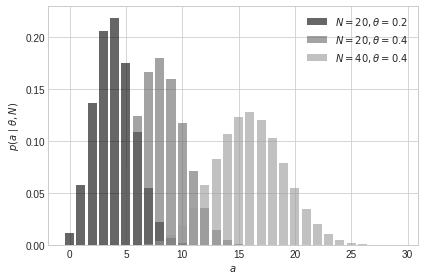

In [ ]:
x = range(30)
def draw(n, p):
  plt.bar(x, stats.binom.pmf(x, n, p),
          label=r'$N={}, \theta={}$'.format(n, p), alpha=0.6)
draw(20, 0.2)
draw(20, 0.4)
draw(40, 0.4)
plt.xlabel(r'$a$')
plt.ylabel(r'$p(a\mid\theta, N)$')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
likelihood = lambda a, N: thetas ** a * (1 - thetas) ** (N - a)

In [ ]:
def posterior(a, N, prior):
  lp = likelihood(a, N) * prior
  return lp / lp.sum()

アリスとボブのレポートに基づいたクリック率 $\theta$ の事後分布（二項分布による別解）

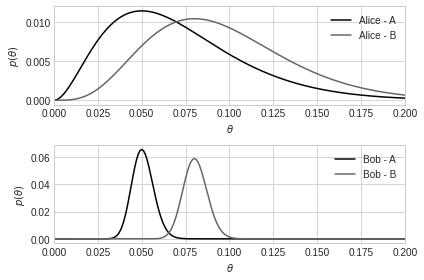

In [ ]:
prior = 1 / len(thetas)
plt.subplot(2, 1, 1)
plt.plot(thetas, posterior(2, 40, prior), label='Alice - A')
plt.plot(thetas, posterior(4, 50, prior), label='Alice - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(thetas, posterior(64, 1280, prior), label='Bob - A')
plt.plot(thetas, posterior(128, 1600, prior), label='Bob - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.legend()
plt.tight_layout()
plt.show()

## 別解2: ベータ分布

さまざまなベータ分布の例

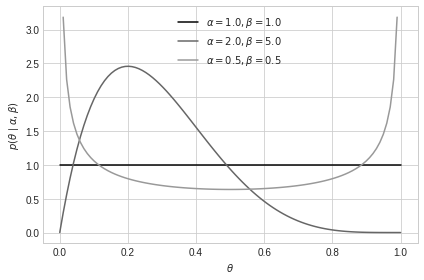

In [ ]:
x = np.linspace(0, 1, 100)
params = [(1, 1), (2, 5), (0.5, 0.5)]
for alpha, beta in params:
  plt.plot(x, stats.beta.pdf(x, alpha, beta),
      label=r'$\alpha=%.1f, \beta=%.1f$' % (alpha, beta))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta\mid\alpha, \beta)$')
plt.legend()
plt.tight_layout()

アリスとボブのレポートに基づいたクリック率 $\theta$ の事後分布（ベータ分布による別解）

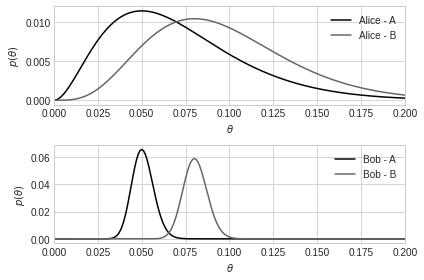

In [ ]:
def betaf(alpha, beta):
  numerator = thetas ** (alpha - 1) * (1 - thetas) ** (beta - 1)
  return numerator / numerator.sum()

def posterior(a, N):
  return betaf(a + 1, N - a + 1)

plt.subplot(2, 1, 1)
plt.plot(thetas, posterior(2, 40), label='Alice - A')
plt.plot(thetas, posterior(4, 50), label='Alice - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(thetas, posterior(64, 1280), label='Bob - A')
plt.plot(thetas, posterior(128, 1600), label='Bob - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.legend()
plt.tight_layout()
plt.show()

## 事後分布から決断を下す

さまざまなHDIの例

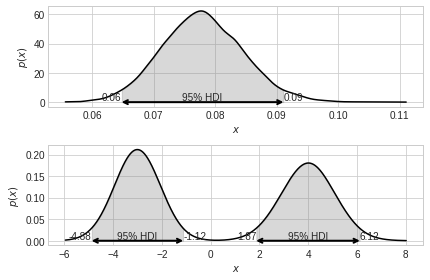

In [ ]:
def hdi(sample, alpha):
  xmin = np.min(sample)
  xmax = np.max(sample)
  density = stats.kde.gaussian_kde(sample)
  xs = np.linspace(xmin, xmax, 2000)
  ys = density.evaluate(xs)
  ymass = ys / np.sum(ys)
  xys = sorted(zip(xs, ymass), key=lambda x: x[1], reverse=True)
  cumsum = 0
  hdv = []
  for xy in xys:
    cumsum += xy[1]
    hdv.append(xy[0])
    if cumsum >= 1 - alpha: break
  hdv.sort()
  where_to_split = np.where(np.diff(hdv) > (xmax - xmin) * 0.01)[0]
  keypoints = [min(hdv)]
  for split in where_to_split:
    keypoints.append(hdv[split])
    keypoints.append(hdv[split + 1])
  keypoints.append(max(hdv))
  intervals = [(keypoints[2 * i], keypoints[2 * i + 1]) for i in range(len(keypoints) // 2)]
  return intervals, xs, ys

plt.subplot(2, 1, 1)
sample = np.random.beta(125, 1477, size=10000)
intervals, x, y = hdi(sample, 0.05)
plt.plot(x, y)
for interval in intervals:
  plt.annotate('', xy=(interval[0], 0), xytext=(interval[1], 0),
               arrowprops=dict(color='black', shrinkA=0, shrinkB=0, arrowstyle='<->', linewidth=2))
  plt.annotate('%.2f' % interval[0], xy=(interval[0], 0), ha='right', va='bottom')
  plt.annotate('%.2f' % interval[1], xy=(interval[1], 0), ha='left', va='bottom')
  plt.annotate('95% HDI', xy=((interval[0] + interval[1])/2, 0), ha='center', va='bottom')
  r = (x > interval[0]) & (x < interval[1])
  plt.fill_between(x[r], y[r], 0, color='gray', alpha=0.3)
plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')

plt.subplot(2, 1, 2)
sample = np.hstack((
    np.random.normal(4, 1, size=10000),
    np.random.normal(-3, 0.8, size=10000)))
intervals, x, y = hdi(sample, 0.05)
plt.plot(x, y)
for interval in intervals:
  plt.annotate('', xy=(interval[0], 0), xytext=(interval[1], 0),
               arrowprops=dict(color='black', shrinkA=0, shrinkB=0, arrowstyle='<->', linewidth=2))
  plt.annotate('95% HDI', xy=((interval[0] + interval[1])/2, 0), ha='center', va='bottom')
  plt.annotate('%.2f' % interval[0], xy=(interval[0], 0), ha='right', va='bottom')
  plt.annotate('%.2f' % interval[1], xy=(interval[1], 0), ha='left', va='bottom')
  r = (x > interval[0]) & (x < interval[1])
  plt.fill_between(x[r], y[r], 0, color='gray', alpha=0.3)
plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')
plt.tight_layout()
plt.show()

### HDIをつかった仮説検定

In [ ]:
def hmv(xs, ps, alpha=0.95):
  """確率質量ランキング上位の値の列を返す関数
  """
  xps = sorted(zip(xs, ps), key=lambda xp: xp[1], reverse=True)
  xps = np.array(xps)
  xs = xps[:, 0]
  ps = xps[:, 1]
  return np.sort(xs[np.cumsum(ps) <= alpha])

In [ ]:
thetas = np.linspace(0, 1, 1001)

def posterior(a, N):
  alpha = a + 1
  beta = N - a + 1
  numerator = thetas ** (alpha - 1) * (1 - thetas) ** (beta - 1)
  return numerator / numerator.sum()

ps = posterior(2, 40)

アリスのデザインA案のHDIの推定値

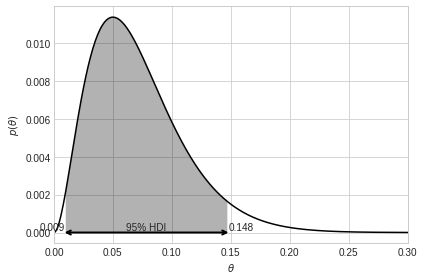

In [ ]:
hm_thetas = hmv(thetas, ps, alpha=0.95)
plt.plot(thetas, ps)
plt.annotate('', xy=(hm_thetas.min(), 0),
              xytext=(hm_thetas.max(), 0),
              arrowprops=dict(color='black', shrinkA=0, shrinkB=0,
                              arrowstyle='<->', linewidth=2))
plt.annotate('%.3f' % hm_thetas.min(), xy=(hm_thetas.min(), 0),
              ha='right', va='bottom')
plt.annotate('%.3f' % hm_thetas.max(), xy=(hm_thetas.max(), 0),
              ha='left', va='bottom')
plt.annotate('95% HDI', xy=(hm_thetas.mean(), 0),
              ha='center', va='bottom')
hm_region = (hm_thetas.min() < thetas) & (thetas < hm_thetas.max())
plt.fill_between(thetas[hm_region], ps[hm_region], 0, alpha=0.3)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.3)
plt.tight_layout()
plt.show()

アリスとボブのレポートの各デザイン案のHDI

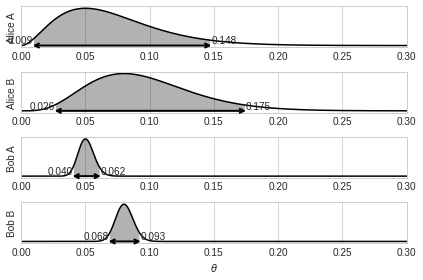

In [ ]:
def plot_hdi(ps, label):
  hm_thetas = hmv(thetas, ps, 0.95)
  plt.plot(thetas, ps)
  plt.annotate('', xy=(hm_thetas.min(), 0),
                xytext=(hm_thetas.max(), 0),
                arrowprops=dict(color='black', shrinkA=0, shrinkB=0,
                                arrowstyle='<->', linewidth=2))
  plt.annotate('%.3f' % hm_thetas.min(), xy=(hm_thetas.min(), 0),
                ha='right', va='bottom')
  plt.annotate('%.3f' % hm_thetas.max(), xy=(hm_thetas.max(), 0),
                ha='left', va='bottom')
  hm_region = (hm_thetas.min() < thetas) & (thetas < hm_thetas.max())
  plt.fill_between(thetas[hm_region], ps[hm_region], 0, alpha=0.3)
  plt.xlim(0, 0.3)
  plt.ylabel(label)
  plt.yticks([])

plt.subplot(4, 1, 1)
alice_a = posterior(2, 40)
plot_hdi(alice_a, 'Alice A')
plt.subplot(4, 1, 2)
alice_b = posterior(4, 50)
plot_hdi(alice_b, 'Alice B')
plt.subplot(4, 1, 3)
bob_a = posterior(64, 1280)
plot_hdi(bob_a, 'Bob A')
plt.subplot(4, 1, 4)
bob_b = posterior(128, 1600)
plot_hdi(bob_b, 'Bob B')
plt.xlabel(r'$\theta$')
plt.tight_layout()
plt.show()

### 新たな確率変数を導入する
アリスのレポートのデザインA案のクリック率の事後分布から得られたサンプルのヒストグラム

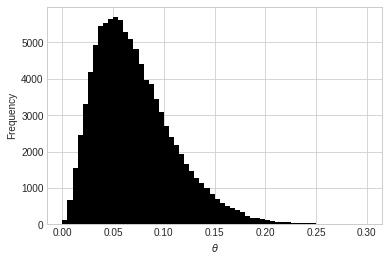

In [ ]:
data = np.random.beta(3, 39, size=100000)
plt.hist(data, range=(0, 0.3), bins=60)
plt.xlabel(r'$\theta$')
plt.ylabel('Frequency')
plt.show()

アリスのレポートのデザイン案のクリック率の差を表す確率変数 $\delta$ のヒストグラム

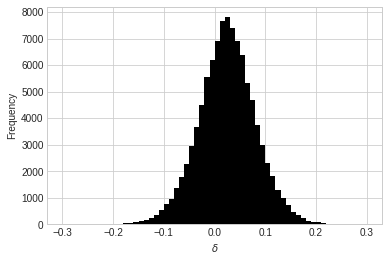

In [ ]:
theta_a = np.random.beta(3, 39, size=100000)
theta_b = np.random.beta(5, 47, size=100000)
delta = theta_b - theta_a
plt.hist(delta, range=(-0.3, 0.3), bins=60)
plt.xlabel(r'$\delta$')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print((delta > 0).mean())

0.68371


ボブのレポートのデザイン案のクリック率の差を表す確率変数 $\delta$ のヒストグラム

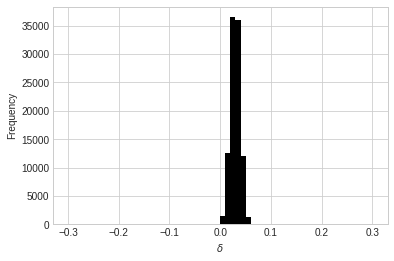

In [ ]:
theta_a = np.random.beta(65, 1217, size=100000)
theta_b = np.random.beta(129, 1473, size=100000)
delta = theta_b - theta_a
plt.hist(delta, range=(-0.3, 0.3), bins=60)
plt.xlabel(r'$\delta$')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print((delta > 0).mean())

0.99941


クリック率の差の確率密度関数 $p(\delta)$ の推論結果。0以上の領域を異なる色で示した

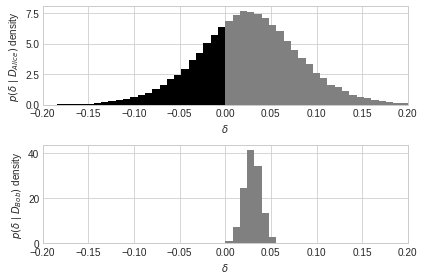

In [ ]:
plt.subplot(2, 1, 1)
alice_a = np.random.beta(3, 39, size=100000)
alice_b = np.random.beta(5, 47, size=100000)
alice_delta = alice_b - alice_a
N, bins, patches = plt.hist(alice_delta, bins=50, range=(-0.2, 0.2), density=1, color='gray')
for i in np.where(bins < 0)[0]:
  patches[i].set_facecolor('black')
plt.xlim(-0.2, 0.2)
plt.xlabel(r'$\delta$')
plt.ylabel(r'$p(\delta\mid D_{Alice})$ density')

plt.subplot(2, 1, 2)
bob_a = np.random.beta(65, 1217, size=100000)
bob_b = np.random.beta(129, 1473, size=100000)
bob_delta = bob_b - bob_a
N, bins, patches = plt.hist(bob_delta, bins=50, range=(-0.2, 0.2), density=1,color='gray')
for i in np.where(bins < 0)[0]:
  patches[i].set_facecolor('black')
plt.xlim(-0.2, 0.2)
plt.xlabel(r'$\delta$')
plt.ylabel(r'$p(\delta\mid D_{Bob})$ density')
plt.tight_layout()